# IMPORT LIBRARIES

In [37]:
import pandas as pd
from scipy import stats
import BiQ_Common_Fxns as BiQ
import pandas as pd
from scipy import stats
from tkinter import filedialog, Tk, simpledialog
import tkinter as tk
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import scienceplots

# PLOTS STYLE

In [38]:
plt.style.use(['science', 'grid', 'notebook'])

# Set line color
trendline_color = 'black'

# Set line width
linewidth = 1  # Replace with your desired line width (numeric value)

# Set marker design
scatter_size = 30
scatter_edgecolor = 'black'

# Set font sizes
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 14
tick_label_fontsize = 12

# EXTRACT DATA AND PERFORM TEST

Columns in Excel sheet:
Index(['X', 'Y', 'Z', 'Alpha', 'Beta'], dtype='object')
+--------------------+--------+--------+
| Statistic          |      X | Y      |
+====================+========+========+
| Mean               | 49.925 | 50.326 |
+--------------------+--------+--------+
| Standard Deviation |  9.76  | 9.989  |
+--------------------+--------+--------+
| SE Mean            |  0.309 | 0.316  |
+--------------------+--------+--------+
| 95% CI Lower       | 49.32  | 49.707 |
+--------------------+--------+--------+
| 95% CI Upper       | 50.53  | 50.945 |
+--------------------+--------+--------+
|                    |        |        |
+--------------------+--------+--------+
| Alpha              |  0.05  |        |
+--------------------+--------+--------+
| t-statistic        | -0.909 |        |
+--------------------+--------+--------+
| p-value            |  0.363 |        |
+--------------------+--------+--------+
Fail to reject the null hypothesis: There is no significant

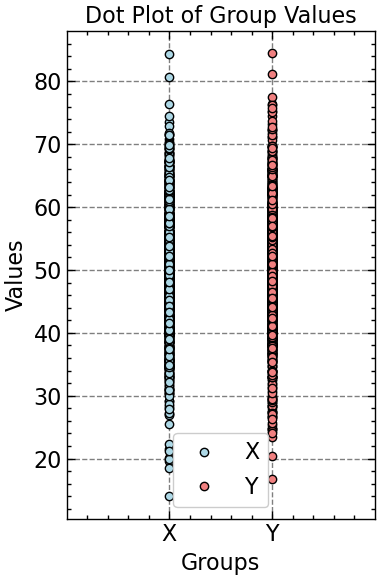

In [39]:
def read_excel_file(file_path):
    """Reads an Excel file and returns a DataFrame."""
    try:
        df = pd.read_excel(file_path)  # Read Excel file into a temporary DataFrame
        df = df.dropna(axis=1, how='all')  # Drop columns that are entirely blank
        return df  # Return the DataFrame
    except Exception as e:
        print(f"Error reading Excel file: {e}")  # Print error message if file reading fails
        return None  # Return None if an error occurs

def calculate_stats(data):
    """Calculates mean, std dev, SE, and confidence interval."""
    try:
        mean = np.mean(data)
        std_dev = np.std(data, ddof=1)  # Use ddof=1 for sample std dev
        se = std_dev / np.sqrt(len(data))
        # Calculate 95% confidence interval
        margin_error = 1.96 * se  # 1.96 for 95% CI
        conf_interval = (mean - margin_error, mean + margin_error)
        return mean, std_dev, se, conf_interval
    except Exception as e:
        print(f"Error calculating statistics: {e}")
        return None, None, None, None

def perform_t_test(group1, group2, group1_name, group2_name, equal_var=True):
    """Performs a two-sample t-test and prints statistical results."""
    try:
        # Calculate statistics for each group
        mean1, std_dev1, se1, conf_interval1 = calculate_stats(group1)
        mean2, std_dev2, se2, conf_interval2 = calculate_stats(group2)

        if None in (mean1, mean2, std_dev1, std_dev2, se1, se2, conf_interval1, conf_interval2):
            print("Error calculating statistics. Check your input data.")
            return

        # Perform two-sample t-test
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=equal_var)

        # Prepare data for the table
        table_data = [
            ["Statistic", group1_name, group2_name],
            ["Mean", f"{mean1:.3f}", f"{mean2:.3f}"],
            ["Standard Deviation", f"{std_dev1:.3f}", f"{std_dev2:.3f}"],
            ["SE Mean", f"{se1:.3f}", f"{se2:.3f}"],
            ["95% CI Lower", f"{conf_interval1[0]:.3f}", f"{conf_interval2[0]:.3f}"],
            ["95% CI Upper", f"{conf_interval1[1]:.3f}", f"{conf_interval2[1]:.3f}"],
            [],  # Blank row
            ["Alpha", "0.05", ""],  # Alpha value row
            ["t-statistic", f"{t_stat:.3f}", ""],
            ["p-value", f"{p_value:.3f}", ""],
        ]

        # Print the table with borders
        print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

        # Interpret the results
        if p_value < 0.05:
            print("Reject the null hypothesis: There is a significant difference between the groups.")
        else:
            print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

        # Plotting dot plot with light blue and light red markers
        plt.figure(figsize=(4, 6))
        plt.plot([1] * len(group1), group1, 'bo', label=group1_name, markeredgewidth=1, markeredgecolor=scatter_edgecolor, markerfacecolor='lightblue')
        plt.plot([2] * len(group2), group2, 'ro', label=group2_name, markeredgewidth=1, markeredgecolor=scatter_edgecolor, markerfacecolor='lightcoral')
        plt.xlim(0.0, 3)
        plt.xticks([1, 2], [group1_name, group2_name])
        plt.xlabel('Groups')
        plt.ylabel('Values')
        plt.title('Dot Plot of Group Values')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error performing t-test and plotting dot plots: {e}")

def get_user_column_selection(df):
    """Gets user input for selecting columns using dialog boxes."""
    root = Tk()
    root.withdraw()  # Hide the main window

    # Get column names from the DataFrame
    columns = df.columns.tolist()

    # Ask user to select columns for the two groups
    group1_col = simpledialog.askstring("Input", f"Enter the column name for group 1:\nAvailable columns: {', '.join(columns)}")
    group2_col = simpledialog.askstring("Input", f"Enter the column name for group 2:\nAvailable columns: {', '.join(columns)}")

    return group1_col, group2_col

def get_equal_variance_input():
    """Gets user input for equal variance assumption."""
    equal_var_str = simpledialog.askstring("Input", "Enter 'True' for assuming equal variances, 'False' otherwise:")
    return equal_var_str.lower() == 'true'

def main():
    # Open a file dialog to select Excel file
    root = Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename(filetypes=[("Excel files", "*.xlsx"), ("All files", "*.*")])
    if not file_path:
        print("No file selected.")
        return

    # Read Excel file into DataFrame
    df = read_excel_file(file_path)
    if df is None:
        print("Error reading Excel file.")
        return

    print("Columns in Excel sheet:")
    print(df.columns)  # Display column names

    # Get user input for column selection
    group1_col, group2_col = get_user_column_selection(df)

    # Check if the selected columns exist in the DataFrame
    if group1_col in df.columns and group2_col in df.columns:
        # Extract data from selected columns
        group1 = df[group1_col].dropna()
        group2 = df[group2_col].dropna()

        # Get user input for equal variance assumption
        equal_var = get_equal_variance_input()

        # Perform two-sample t-test and plot dot plot
        perform_t_test(group1, group2, group1_col, group2_col, equal_var=equal_var)
    else:
        print("Error: One or both selected columns do not exist in the DataFrame.")

if __name__ == "__main__":
    main()
